In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

In [19]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
X = sm.add_constant(data['X'])
#ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
#sns.despine()
#plt.tight_layout()

In [21]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta = pd.Series(beta, index=X.columns)
model = sm.OLS(data['Y'], X).fit()
print(beta, '\n', model.summary())

const   51.58
X        1.93
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     192.3
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           7.59e-25
Time:                        14:40:40   Log-Likelihood:                -451.57
No. Observations:                 100   AIC:                             907.1
Df Residuals:                      98   BIC:                             912.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

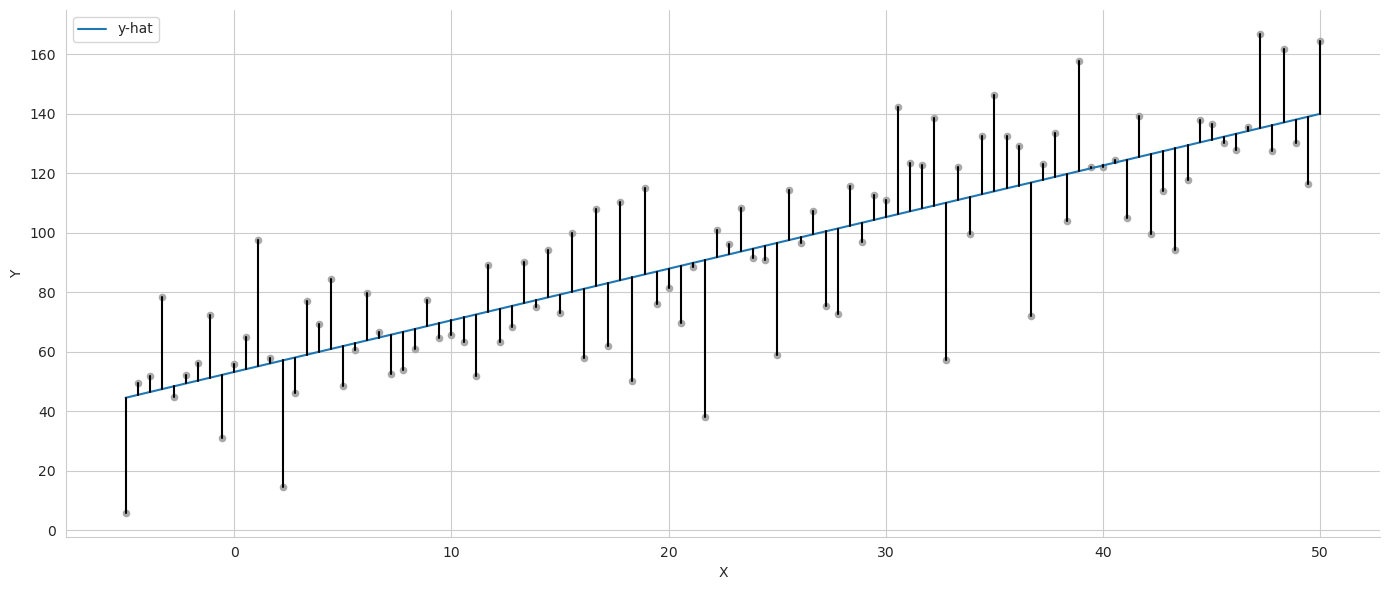

In [6]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid  # residuals = y - y_hat
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    #(row.X, row.X)表示2个x坐标，plot是把(x,y)、(x,y_pred)连成一条线段
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')
sns.despine()
plt.tight_layout();

In [24]:
## Create data  
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)
X = data[['X_1', 'X_2']]
y = data['Y']
X_ols = sm.add_constant(X)

## Plot
#three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
#three_dee = plt.figure(figsize=(15, 5)).add_subplot(projection='3d')
#three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
#sns.despine()
#plt.tight_layout();

In [25]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
beta = pd.Series(beta, index=X_ols.columns)

model = sm.OLS(y, X_ols).fit()
print(beta, '\n', model.summary())

const   52.74
X_1      0.95
X_2      2.96
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1152.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          6.49e-210
Time:                        14:42:46   Log-Likelihood:                -3313.7
No. Observations:                 625   AIC:                             6633.
Df Residuals:                     622   BIC:                             6647.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

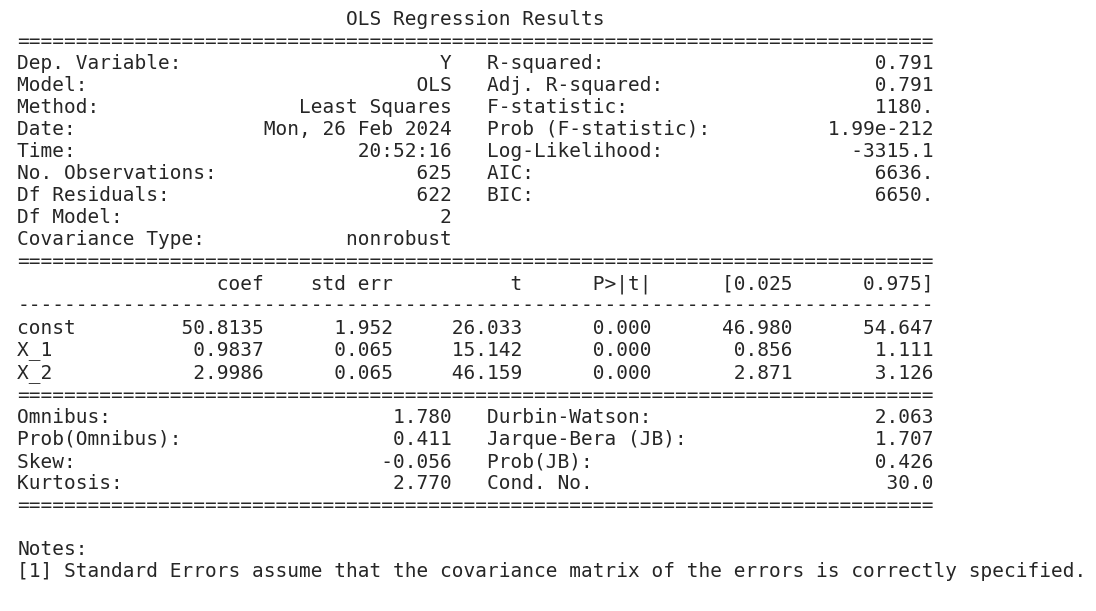

In [28]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

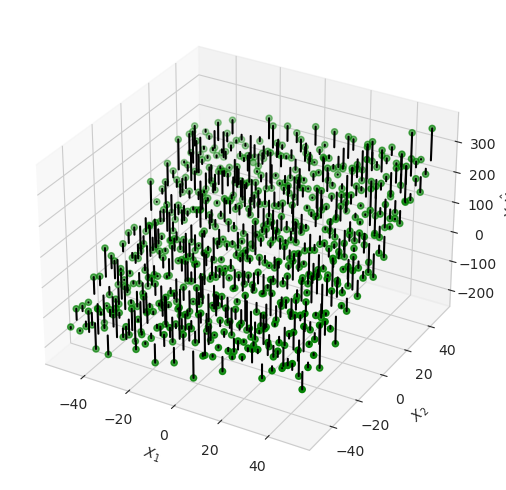

In [33]:
#three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee = plt.figure(figsize=(15, 5)).add_subplot(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
#three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');
three_dee.set_ylabel('$X_2$');
three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

In [27]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)
#sgd = SGDRegressor(loss='squared_loss',
sgd = SGDRegressor(loss='squared_error',
                   fit_intercept=True, 
                   shuffle=True, 
                   random_state=42,
                   learning_rate='invscaling', 
                   eta0=0.01, 
                   power_t=0.25)
# sgd.n_iter = np.ceil(10**6 / len(y))
sgd.fit(X=X_, y=y)

SGDRegressor(random_state=42)

In [33]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_
aa = pd.Series(coeffs, index=X.columns)
bb = (sgd.coef_ - scaler.mean_) / scaler.scale_
print(aa, '\n', bb)

X_1     869.12
X_2   2,673.19
dtype: float64 
 [0.9627175  2.96107122]


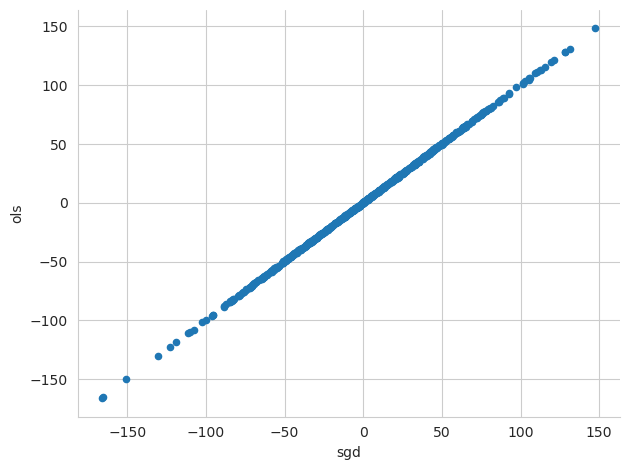

In [34]:
resids = pd.DataFrame({'sgd': y - sgd.predict(X_),
                      'ols': y - model.predict(sm.add_constant(X))})
resids.pow(2).sum().div(len(y)).pow(.5) #平方误差均值的开方，学名叫啥？
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout();